In [1]:
import pandas as pd

In [2]:
import pandas as pd

file_path = r'C:\Users\Nilanjan\Downloads\archive(17)\netflix_titles.csv'  # Replace with your CSV file path

# Try reading the CSV with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8')  # Standard UTF-8
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin1')  # Alternate encoding
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Another fallback

print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Season

In [3]:

# Drop columns with 'Unnamed' in their names (extra blank columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display cleaned data
print(df.head())

# Optionally save the cleaned dataset for future use
df.to_csv(r'C:\Users\Nilanjan\Downloads\cleaned_netflix.csv', index=False)


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
# Basic summary statistics
print(df.describe())

# For categorical columns, get the count of unique values
print(df['type'].value_counts())
print(df['rating'].value_counts())
print(df['country'].value_counts())


       release_year
count   8809.000000
mean    2014.181292
std        8.818932
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2024.000000
Movie      6132
TV Show    2677
Name: type, dtype: int64
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
A              1
Name: rating, dtype: int64
United States                             2819
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                200
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico,

In [5]:
# Fill missing values in 'director' and 'cast' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Or, drop rows with missing 'title' (if essential)
df.dropna(subset=['title'], inplace=True)

# Check if missing data is handled
print(df.isnull().sum())


show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64


In [6]:
# Split genres and count the frequency of each genre
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()
print(genre_counts.head())


International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64


In [7]:
# Distribution of content by country
country_counts = df['country'].value_counts()
print(country_counts.head(10))  # Top 10 countries


United States     2819
India              972
United Kingdom     419
Japan              245
South Korea        200
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


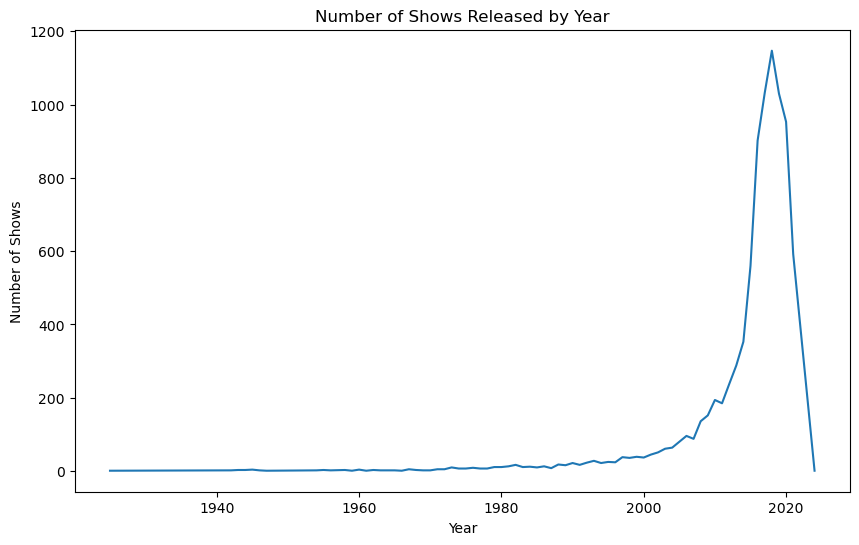

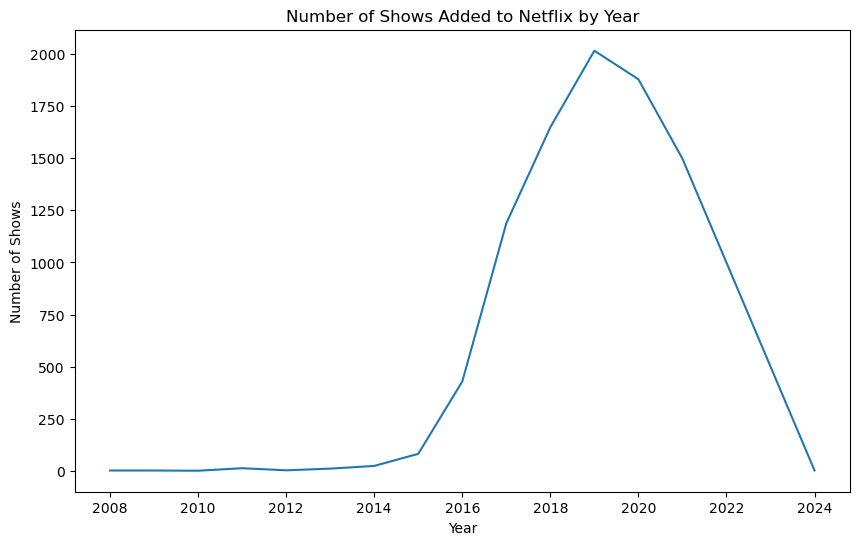

In [8]:
import matplotlib.pyplot as plt

# Plot the number of shows released per year
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Number of Shows Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.show()

# Date added trends
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert to datetime
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Number of Shows Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.show()


Movie      6132
TV Show    2677
Name: type, dtype: int64


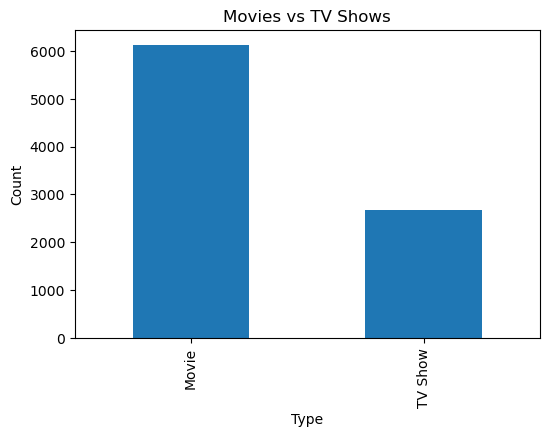

In [9]:
# Count of Movies vs TV Shows
type_counts = df['type'].value_counts()
print(type_counts)
type_counts.plot(kind='bar', figsize=(6, 4))
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [10]:
# Split the 'listed_in' column into individual genres, and explode it
df['genres'] = df['listed_in'].str.split(',').explode().str.strip().reset_index(drop=True)

# Group by country and genre, count occurrences
country_genre_counts = df.groupby(['country', 'genres']).size().reset_index(name='count')

# Sort by country and genre count
country_genre_counts = country_genre_counts.sort_values(by=['country', 'count'], ascending=[True, False])

# Display the top genres per country
print(country_genre_counts.head(20))  # Adjust this as needed to see more/less data


              country                    genres  count
0   , France, Algeria            Classic Movies      1
1       , South Korea                  Comedies      1
4           Argentina                  Comedies      7
6           Argentina                    Dramas      6
9           Argentina      International Movies      5
11          Argentina                  Kids' TV      4
15          Argentina           Romantic Movies      4
10          Argentina    International TV Shows      3
21          Argentina               TV Comedies      3
22          Argentina                 TV Dramas      3
23          Argentina                 Thrillers      3
5           Argentina            Crime TV Shows      2
7           Argentina             Horror Movies      2
8           Argentina        Independent Movies      2
12          Argentina           Korean TV Shows      2
14          Argentina                Reality TV      2
2           Argentina  Children & Family Movies      1
3         

In [11]:
# Filter the dataset to include only TV Shows and Movies
tv_genre_counts = df[df['type'] == 'TV Show'].groupby('genres').size().reset_index(name='tv_count')
movie_genre_counts = df[df['type'] == 'Movie'].groupby('genres').size().reset_index(name='movie_count')

# Merge the counts to compare genres for TV shows vs Movies
genre_comparison = pd.merge(tv_genre_counts, movie_genre_counts, on='genres', how='outer').fillna(0)

# Sort the genres by the combined count (TV + Movies)
genre_comparison['total_count'] = genre_comparison['tv_count'] + genre_comparison['movie_count']
genre_comparison = genre_comparison.sort_values(by='total_count', ascending=False)

# Display the top genres by total content (TV shows + Movies)
print(genre_comparison[['genres', 'tv_count', 'movie_count', 'total_count']].head(20))


                      genres  tv_count  movie_count  total_count
16      International Movies     377.0          854       1231.0
12                    Dramas     325.0          704       1029.0
7                   Comedies     243.0          518        761.0
17    International TV Shows     230.0          495        725.0
33                 TV Dramas     100.0          310        410.0
0         Action & Adventure     111.0          235        346.0
32               TV Comedies      96.0          226        322.0
4   Children & Family Movies      98.0          215        313.0
23           Romantic Movies      84.0          219        303.0
10             Documentaries      95.0          183        278.0
15        Independent Movies      82.0          177        259.0
40                 Thrillers      85.0          170        255.0
8             Crime TV Shows      64.0          186        250.0
18                  Kids' TV      80.0          169        249.0
24         Romantic TV Sh

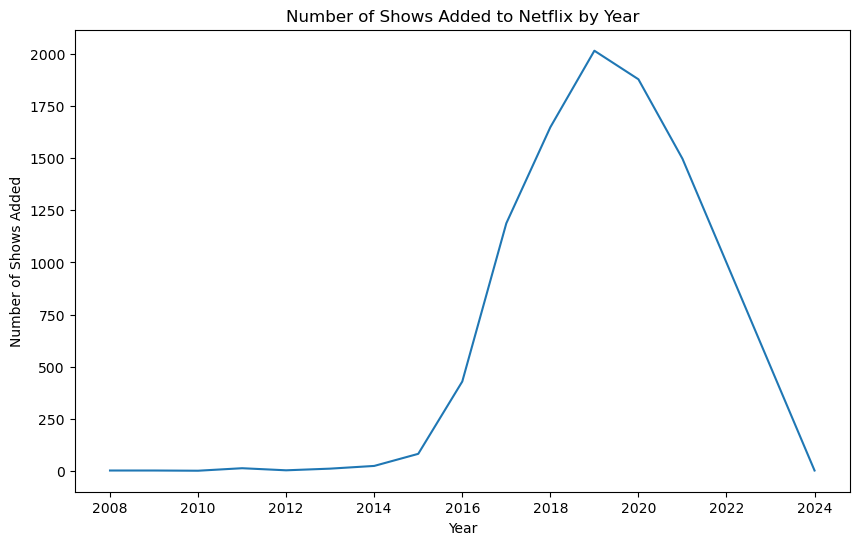

In [12]:
# Group by the year of content addition
df['year_added'] = df['date_added'].dt.year

# Count the number of shows added per year
yearly_addition = df['year_added'].value_counts().sort_index()

# Plot the trends
yearly_addition.plot(kind='line', figsize=(10, 6))
plt.title('Number of Shows Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.show()


<Figure size 3000x2600 with 0 Axes>

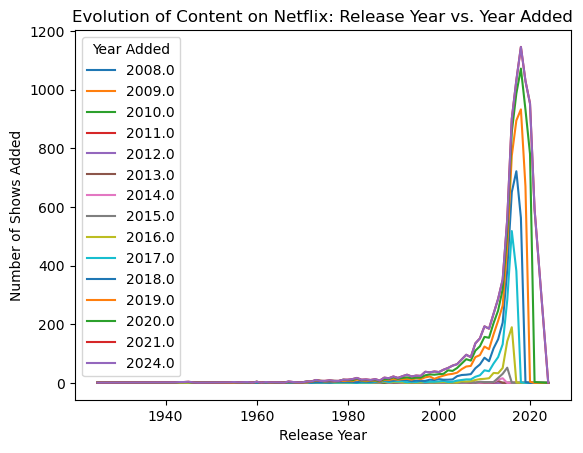

In [13]:
# Plot the release year vs. year added
plt.figure(figsize=(30, 26))
df.groupby(['release_year', 'year_added']).size().unstack().plot(kind='line', stacked=True)
plt.title('Evolution of Content on Netflix: Release Year vs. Year Added')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows Added')
plt.legend(title='Year Added')
plt.show()


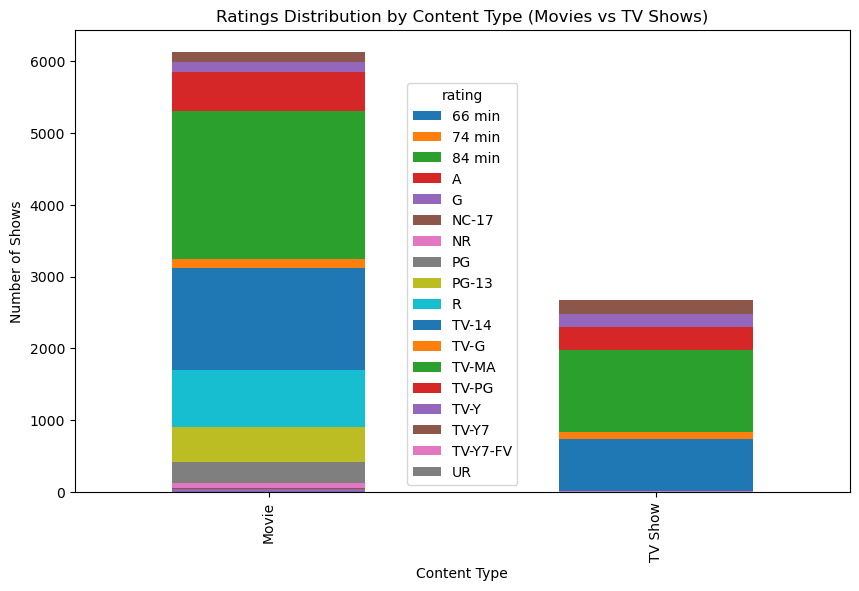

In [14]:
# Group by type and rating, then count occurrences
rating_distribution = df.groupby(['type', 'rating']).size().unstack().fillna(0)

# Plot the distribution
rating_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ratings Distribution by Content Type (Movies vs TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Number of Shows')
plt.show()


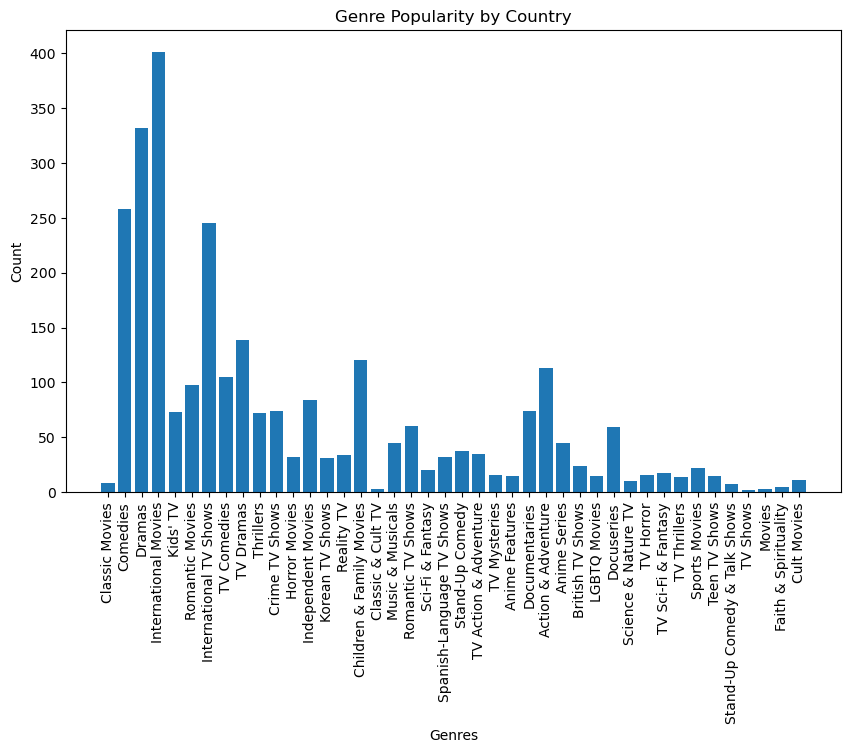

In [15]:
# Drop rows with NaN values in the 'count' column
country_genre_counts = country_genre_counts.dropna(subset=['count'])

# Ensure 'count' is numeric and convert errors to NaN
country_genre_counts['count'] = pd.to_numeric(country_genre_counts['count'], errors='coerce')

# Drop any remaining rows where 'count' is NaN
country_genre_counts = country_genre_counts.dropna(subset=['count'])

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(country_genre_counts['genres'], country_genre_counts['count'])
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Popularity by Country')
plt.xticks(rotation=90)
plt.show()


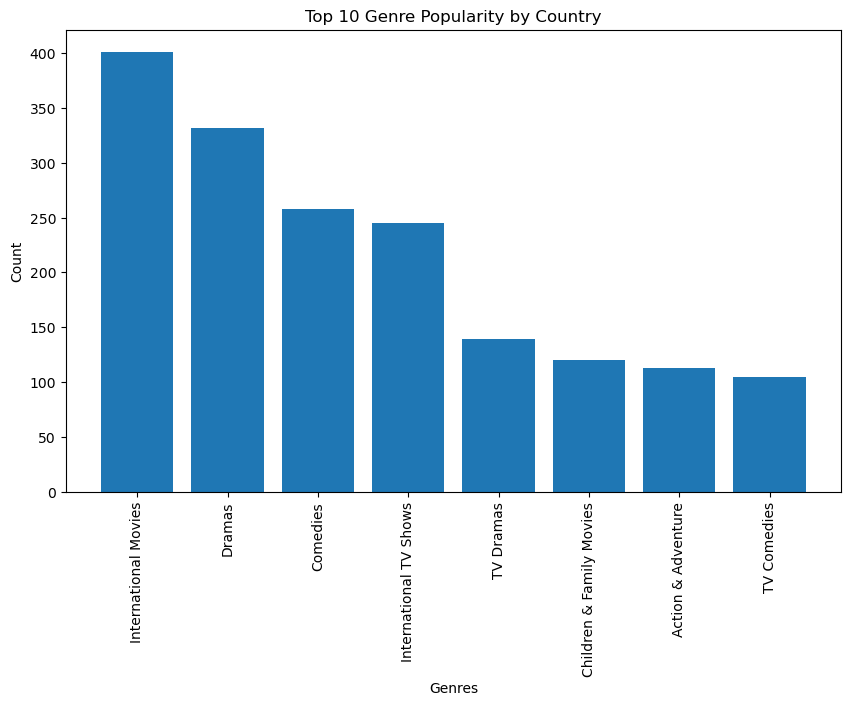

In [16]:
# Plot the top N most popular genres
top_n = 10
top_genres = country_genre_counts.nlargest(top_n, 'count')

# Now plot the top N genres
plt.figure(figsize=(10, 6))
plt.bar(top_genres['genres'], top_genres['count'])
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title(f'Top {top_n} Genre Popularity by Country')
plt.xticks(rotation=90)
plt.show()


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Clean and preprocess
df['genres'] = df['listed_in'].str.split(',').apply(lambda x: ' '.join(x))  # Combine genres
df['description'] = df['description'].fillna('')  # Fill missing descriptions
df['cast'] = df['cast'].fillna('')  # Fill missing cast info

# Combine genres, cast, and description to create a content-based feature
df['content_features'] = df['genres'] + ' ' + df['cast'] + ' ' + df['description']


In [18]:
# Convert text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content_features'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [25]:
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title].tolist()[0]
    
    # Get the pairwise similarity scores for all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top N most similar movies
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the movie indices and titles
    movie_indices = [i[0] for i in sim_scores]
    movie_titles = df['title'].iloc[movie_indices]
    
    # Get additional details like genre, cast, and description
    movie_details = df[['title', 'genres', 'cast', 'description']].iloc[movie_indices]
    
    recommendations = []
    for i in range(top_n):
        recommendations.append(f"**{movie_titles.iloc[i]}**\n"
                              f"Genres: {movie_details['genres'].iloc[i]}\n"
                              f"Cast: {movie_details['cast'].iloc[i]}\n"
                              f"Description: {movie_details['description'].iloc[i]}\n")
    
    return "\n".join(recommendations)

# Example: Get fancy recommendations for a specific movie or show
print(get_recommendations('The Witcher'))


**The Witcher: A Look Inside the Episodes**
Genres: Docuseries  TV Sci-Fi & Fantasy
Cast: Henry Cavill, Anya Chalotra, Freya Allan, Lauren Schmidt Hissrich, Eamon Farren, Mimi Ndiweni, MyAnna Buring, Joey Batey, Adam Levy, Jodhi May
Description: With series creator Lauren S. Hissrich as your guide, take an in-depth journey into the stories and themes powering the first season of "The Witcher."

**Making The Witcher**
Genres: Documentaries
Cast: Henry Cavill, Anya Chalotra, Freya Allan, Eamon Farren, Mimi Ndiweni, Adam Levy, MyAnna Buring, Joey Batey, Lauren Schmidt Hissrich, Tomasz BagiÅski, Andrew Laws, Sneha Koorse, Declan De Barra, Beau DeMayo, Simon Emanuel, IvÃ¡n PohÃ¡rnok, Tim Aslam, Charlotte BrÃ¤ndstrÃ¶m
Description: Journey into the extraordinary world of "The Witcher" â from casting the roles to Jaskier's catchy song â in this behind-the-scenes look at the series.

**The Irregulars**
Genres: British TV Shows  Crime TV Shows  International TV Shows
Cast: Mckell David, Tha

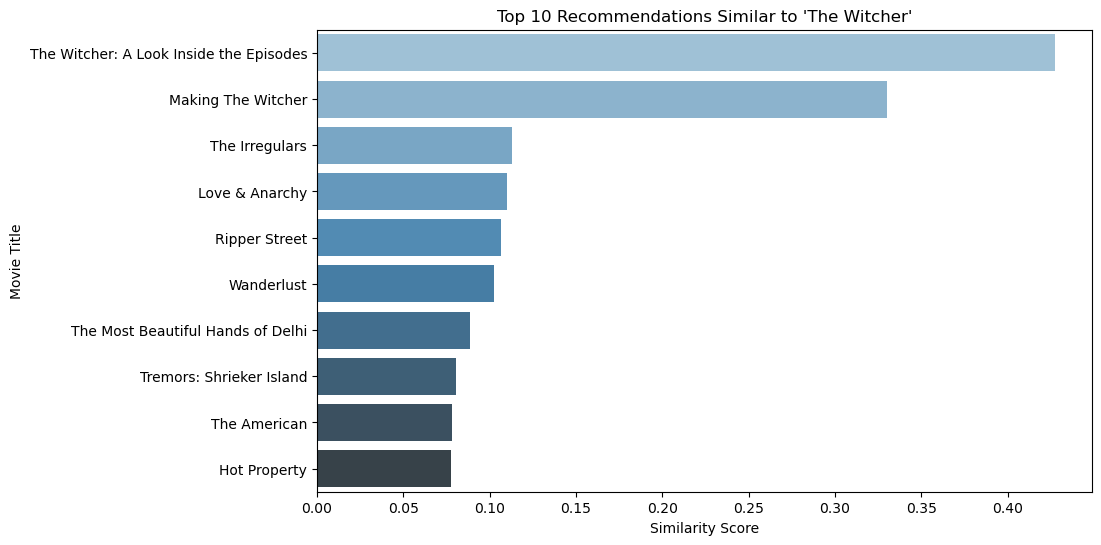

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title].tolist()[0]
    
    # Get the pairwise similarity scores for all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top N most similar movies
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the movie indices and titles
    movie_indices = [i[0] for i in sim_scores]
    movie_titles = df['title'].iloc[movie_indices]
    
    # Get the similarity scores
    similarity_scores = [i[1] for i in sim_scores]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=similarity_scores, y=movie_titles, palette='Blues_d')
    plt.title(f"Top {top_n} Recommendations Similar to '{title}'")
    plt.xlabel('Similarity Score')
    plt.ylabel('Movie Title')
    plt.show()

# Example: Plot recommendations for a specific movie or show
plot_recommendations('The Witcher')
